In [1]:
# DECISION TREES 
# REGRESSION TREE FOR CONTINUOUS QUANTITATIVE VARIABLE
# CLASSIFICATION TREE FOR DISCRETE CATEGORICAL VARIABLE

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Loading Final_data data from previous model 

data = pd.read_csv('C:/Users/MANISH KUMAR/Desktop/Y Finance/ML project/Final_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 99.4 KB


In [5]:
data.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [6]:
data.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [7]:
X = data.loc[:,data.columns!="Role_Manager"]
y = data['Role_Manager']

# Test-Train Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [10]:
X_train.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
1062,1,0,61410.0,4,83,59,102928.71
215,1,1,59781.0,1,46,41,76811.45
654,1,0,62521.0,1,70,59,77733.27
55,1,0,66624.0,1,63,58,110438.17
1187,3,0,54621.0,2,52,62,74204.19


In [11]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [12]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [13]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [14]:
y_test_pred

array([0.11386139, 0.11386139, 0.11386139, 0.475     , 0.        ,
       0.11386139, 0.11386139, 0.11386139, 0.04807692, 0.22222222,
       0.        , 0.        , 0.81967213, 0.        , 0.        ,
       0.97849462, 0.11386139, 0.11386139, 0.11386139, 0.        ,
       0.81967213, 0.97849462, 0.        , 0.11386139, 0.475     ,
       0.11386139, 0.11386139, 0.97849462, 0.11386139, 0.475     ,
       0.04807692, 0.04807692, 0.11386139, 0.22222222, 0.97849462,
       0.        , 0.04807692, 0.11386139, 0.04807692, 0.11386139,
       0.04807692, 0.11386139, 0.        , 0.11386139, 0.11386139,
       0.        , 0.475     , 0.11386139, 0.04807692, 0.        ,
       0.97849462, 0.11386139, 0.97849462, 0.11386139, 0.81967213,
       0.11386139, 0.11386139, 0.475     , 0.11386139, 0.11386139,
       0.11386139, 0.11386139, 0.11386139, 0.11386139, 0.11386139,
       0.        , 0.11386139, 0.475     , 0.81967213, 0.81967213,
       0.11386139, 0.        , 0.        , 0.        , 0.81967

In [15]:
X_train.columns

Index(['College', 'City', 'Previous CTC', 'Previous job change',
       'Graduation Marks', 'EXP (Month)', 'CTC'],
      dtype='object')

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mean_squared_error(y_test, y_test_pred)

0.07698420553990945

In [18]:
r2_score(y_train, y_train_pred)

0.5001598458734787

In [19]:
r2_score(y_test, y_test_pred)

0.5211029280869954

# Training Classification Tree

In [20]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [21]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Predict values using trained model

In [22]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [23]:
y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# Model Performance

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[994,  13],
       [123, 141]], dtype=int64)

In [26]:
confusion_matrix(y_test, y_test_pred)

array([[250,   4],
       [ 28,  36]], dtype=int64)

In [27]:
accuracy_score(y_test, y_test_pred)

0.89937106918239

# Plotting decision tree

In [28]:
from sklearn.tree import export_graphviz

In [29]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [30]:
from IPython.display import Image
import pydotplus 

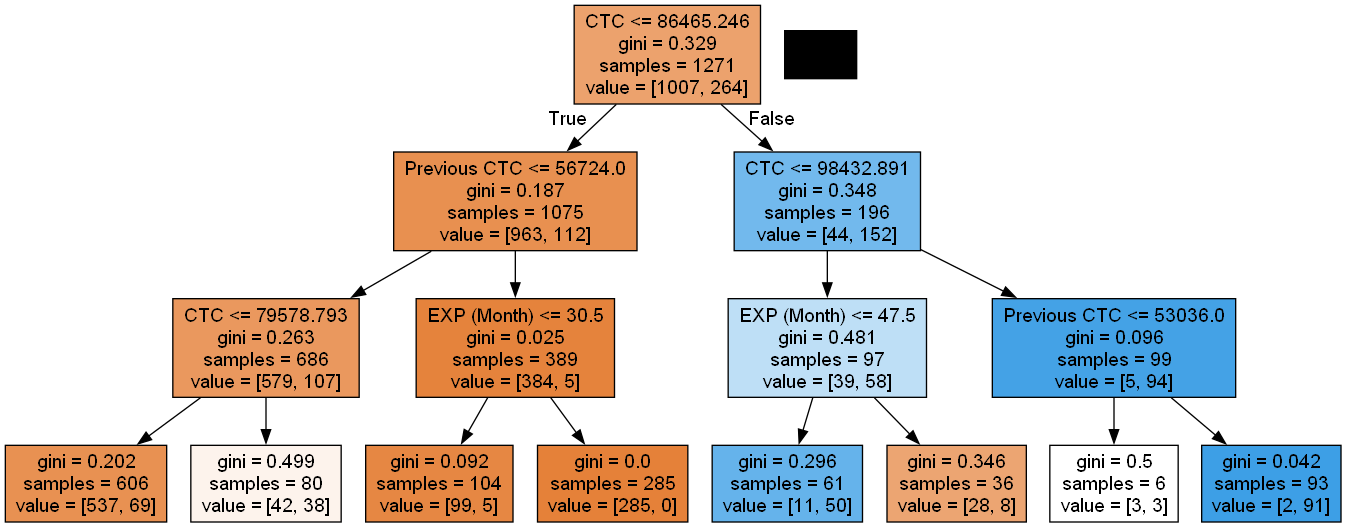

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling Tree growth

In [32]:
# This black rectangle box near root node is due to software update

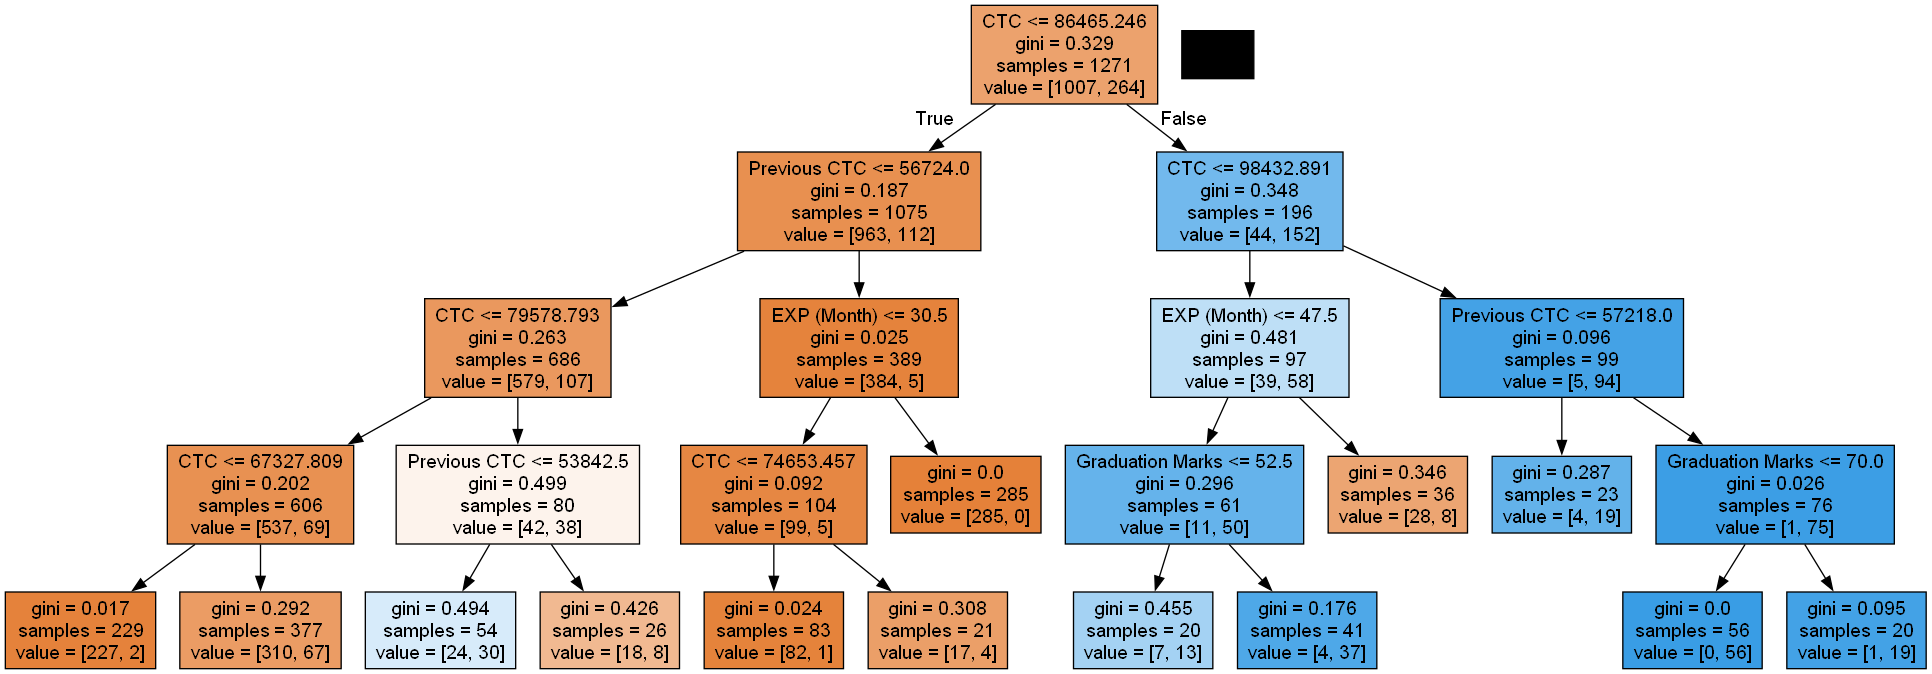

In [33]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [34]:
# Checking accuracy score

accuracy_score(y_test, clftree2.predict(X_test))

0.9119496855345912

# Bagging to improve accuracy

In [35]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier

In [36]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [38]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[246,   8],
       [ 16,  48]], dtype=int64)

In [39]:
# Checking accuracy score

accuracy_score(y_test, bag_clf.predict(X_test)) 

0.9245283018867925

# Random Forest to improve accuracy

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [41]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [42]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[246,   8],
       [ 22,  42]], dtype=int64)

In [43]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9056603773584906

# Grid Search to improve accuracy

In [44]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [45]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [46]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [47]:
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [48]:
grid_search.best_params_ 

{'max_features': 6, 'min_samples_split': 2}

In [49]:
cvrf_clf = grid_search.best_estimator_

In [50]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[246,   8],
       [ 16,  48]], dtype=int64)

In [51]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.9245283018867925

# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.9245283018867925

In [55]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [56]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.8953579858379229

In [57]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8930817610062893

# Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [59]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [60]:
accuracy_score(y_train, ada_clf.predict(X_train))      

0.898505114083399

In [61]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.8867924528301887

In [62]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [63]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [64]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.9056603773584906

# XG Boost

In [65]:
import xgboost as xgb

In [66]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [67]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.9119496855345912

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

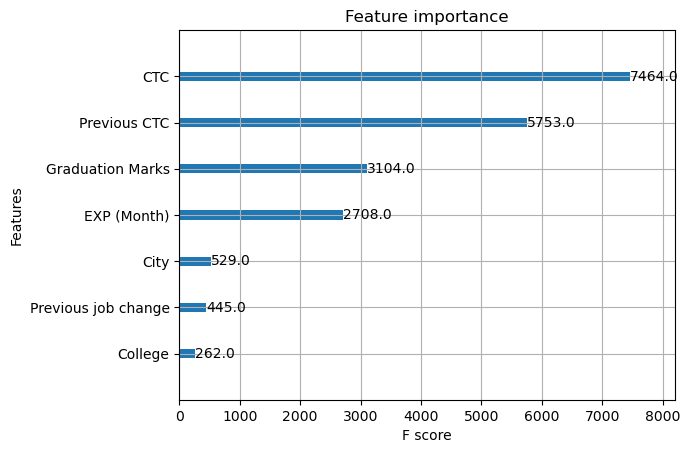

In [69]:
xgb.plot_importance(xgb_clf)

In [70]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [71]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [72]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=Non

In [74]:
cvxg_clf = grid_search.best_estimator_

In [75]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.9150943396226415

In [76]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 0.01,
 'subsample': 0.8}

# REGRESSION TREE performance                                               : 0.8993
# CLASSIFICATION TREE performance                                         : 0.9119
# Ensemble Technique Bagging                                                     : 0.9245
# Ensemble Technique Random Forest grid search                     : 0.9245
# Ensemble Technique Gradient Boosting                                    : 0.8930
# Ensemble Technique Ada Boost                                                  : 0.9025
# Ensemble Technique XG Boost                                                    : 0.9150

# Here Bagging and Random Forest is the best  for CLASSIFICATION TREE

# Logistic Regression (LR)   performance                                       : 0.8747
# Linear Discriminant Ananlysis (LDA) performance                     : 0.8836
# K-Nearest neighbour (KNN) performance                                     : 0.8930
# Here K-Nearest neighbour (KNN) is the best

# Linear Regression performance                                                    : 0.5355
# Ridge model performance                                                              : 0.5360
# Lasso model performance                                                              : 0.5356
# Here Ridge model is best here

# Hence Bagging and Random Forest is the best of overall